In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 16
learning_rate = 0.0005
num_classes = 2
model_name = "efficientnet_b0"
output_dir = "outputs/models/augmented"
metrics_output_dir = "outputs/plots/augmented"
os.makedirs(output_dir, exist_ok=True)


In [5]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(
    data_dir=data_dir, batch_size=batch_size, augmentation="augmented"
)
print("[INFO] Augmented datasets loaded successfully!")

2024-12-25 15:08:24,235 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'augmented'.
2024-12-25 15:08:24,235 - INFO - Applying selected augmentations for wildfire scenarios.
2024-12-25 15:08:24,244 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-25 15:08:24,246 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-25 15:08:24,248 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-25 15:08:24,248 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-25 15:08:24,248 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-25 15:08:24,249 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-25 15:08:24,250 - INFO - Class 'fire' has 730 samples.
2024-12-25 15:08:24,253 - INFO - Class 'nofire' has 1157 samples.
2024-12-25 15:08:24,254 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 

[INFO] Loading augmented datasets...


2024-12-25 15:08:32,142 - INFO - DataLoaders created successfully.


[INFO] Augmented datasets loaded successfully!


In [6]:
# Initialize the model
print(f"\n[INFO] Starting Training for Model: {model_name} with Augmented Data\n")
print(f"[INFO] Initializing {model_name} model...")
model = initialize_model(
    model_name=model_name,
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline augmentation: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: efficientnet_b0 with Augmented Data

[INFO] Initializing efficientnet_b0 model...
[INFO] Model initialized successfully!


In [7]:
# Define loss function and optimizer
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
# Train the model
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

import time

# Start the timer
start_time = time.time()
print("Training started...")


print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,  # No LR scheduler for augmented baseline
    device=device,
    save_path=os.path.join(output_dir, f"{model_name}.pth"),
    early_stop_patience=14,  # Early stopping patience
    monitor_metric="val_f1"
)
print("[INFO] Training completed successfully!")

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Format elapsed time as hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)

print(f"Training completed in {hours} hours, {minutes} minutes, and {seconds} seconds.")


Training started...
[INFO] Starting model training with augmented data...

Starting training...



[INFO] Learning rate adjusted to: 0.000500
[INFO] Best model saved with val_f1: 0.8145
Epoch [1]: Train Loss: 0.5681, Train Acc: 0.7069 | Val Loss: 0.4940, Val Acc: 0.7711, Val Recall: 0.8211, Val F1: 0.8145


[INFO] Learning rate adjusted to: 0.000500
[INFO] Best model saved with val_f1: 0.8466
Epoch [2]: Train Loss: 0.4739, Train Acc: 0.7806 | Val Loss: 0.4419, Val Acc: 0.8134, Val Recall: 0.8415, Val F1: 0.8466


[INFO] Learning rate adjusted to: 0.000500
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [3]: Train Loss: 0.4399, Train Acc: 0.8007 | Val Loss: 0.4076, Val Acc: 0.8184, Val Recall: 0.8171, Val F1: 0.8463


[INFO] Learning rate adjusted to: 0.000500
[INFO] Best model saved with val_f1: 0.8745
Epoch [4]: Train Loss: 0.4294, Train Acc: 0.8119 | Val Loss: 0.3823, Val Acc: 0.8408, Val Recall: 0.9065, Val F1: 0.8745


[INFO] Learning rate adjusted to: 0.000250
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [5]: Train Loss: 0.3952, Train Acc: 0.8156 | Val Loss: 0.3741, Val Acc: 0.8383, Val Recall: 0.8821, Val F1: 0.8697


[INFO] Learning rate adjusted to: 0.000250
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [6]: Train Loss: 0.3942, Train Acc: 0.8283 | Val Loss: 0.3792, Val Acc: 0.8458, Val Recall: 0.8780, Val F1: 0.8745


[INFO] Learning rate adjusted to: 0.000250
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [7]: Train Loss: 0.3821, Train Acc: 0.8352 | Val Loss: 0.3663, Val Acc: 0.8358, Val Recall: 0.8862, Val F1: 0.8685


[INFO] Learning rate adjusted to: 0.000250
[INFO] Best model saved with val_f1: 0.8780
Epoch [8]: Train Loss: 0.3890, Train Acc: 0.8304 | Val Loss: 0.3524, Val Acc: 0.8507, Val Recall: 0.8780, Val F1: 0.8780


[INFO] Learning rate adjusted to: 0.000250
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [9]: Train Loss: 0.3875, Train Acc: 0.8352 | Val Loss: 0.3706, Val Acc: 0.8458, Val Recall: 0.8902, Val F1: 0.8760


[INFO] Learning rate adjusted to: 0.000125
[INFO] Best model saved with val_f1: 0.8925
Epoch [10]: Train Loss: 0.3861, Train Acc: 0.8288 | Val Loss: 0.3449, Val Acc: 0.8682, Val Recall: 0.8943, Val F1: 0.8925


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [11]: Train Loss: 0.3896, Train Acc: 0.8262 | Val Loss: 0.3365, Val Acc: 0.8458, Val Recall: 0.8618, Val F1: 0.8724


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [12]: Train Loss: 0.3976, Train Acc: 0.8161 | Val Loss: 0.3518, Val Acc: 0.8532, Val Recall: 0.8902, Val F1: 0.8813


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [13]: Train Loss: 0.3853, Train Acc: 0.8315 | Val Loss: 0.3523, Val Acc: 0.8557, Val Recall: 0.9106, Val F1: 0.8854


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 4/14
Epoch [14]: Train Loss: 0.3803, Train Acc: 0.8241 | Val Loss: 0.3580, Val Acc: 0.8358, Val Recall: 0.8496, Val F1: 0.8636


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 5/14
Epoch [15]: Train Loss: 0.3866, Train Acc: 0.8272 | Val Loss: 0.3412, Val Acc: 0.8582, Val Recall: 0.9146, Val F1: 0.8876


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 6/14
Epoch [16]: Train Loss: 0.4071, Train Acc: 0.8002 | Val Loss: 0.3737, Val Acc: 0.8284, Val Recall: 0.8455, Val F1: 0.8577


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 7/14
Epoch [17]: Train Loss: 0.3674, Train Acc: 0.8362 | Val Loss: 0.3653, Val Acc: 0.8408, Val Recall: 0.8496, Val F1: 0.8672


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 8/14
Epoch [18]: Train Loss: 0.3746, Train Acc: 0.8437 | Val Loss: 0.3463, Val Acc: 0.8483, Val Recall: 0.8659, Val F1: 0.8747


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 9/14
Epoch [19]: Train Loss: 0.3887, Train Acc: 0.8320 | Val Loss: 0.3357, Val Acc: 0.8458, Val Recall: 0.8618, Val F1: 0.8724


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 10/14
Epoch [20]: Train Loss: 0.3808, Train Acc: 0.8331 | Val Loss: 0.3413, Val Acc: 0.8557, Val Recall: 0.8699, Val F1: 0.8807


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 11/14
Epoch [21]: Train Loss: 0.4064, Train Acc: 0.8209 | Val Loss: 0.3544, Val Acc: 0.8582, Val Recall: 0.8699, Val F1: 0.8825


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 12/14
Epoch [22]: Train Loss: 0.3751, Train Acc: 0.8431 | Val Loss: 0.3494, Val Acc: 0.8483, Val Recall: 0.8618, Val F1: 0.8742


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 13/14
Epoch [23]: Train Loss: 0.3868, Train Acc: 0.8230 | Val Loss: 0.3498, Val Acc: 0.8507, Val Recall: 0.8780, Val F1: 0.8780


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 14/14
Epoch [24]: Train Loss: 0.3576, Train Acc: 0.8458 | Val Loss: 0.3499, Val Acc: 0.8458, Val Recall: 0.8699, Val F1: 0.8735
[INFO] Final metrics saved to outputs/models/augmented\final_metrics.json
[INFO] Training stopped after 24 epochs. Best val_f1: 0.8925

[INFO] Training completed successfully!
Training completed in 0 hours, 5 minutes, and 27 seconds.


In [9]:
# Evaluate the model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name=model_name,
    save_base_path=metrics_output_dir+f"/{model_name}_augmented"
)
print(f"\n[INFO] Metrics for {model_name} with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/augmented/efficientnet_b0_augmented\efficientnet_b0\efficientnet_b0_evaluation.json

[INFO] Metrics for efficientnet_b0 with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.8471337579617835, 'recall': 0.8364779874213837, 'f1-score': 0.8417721518987342, 'support': 159.0}, 'Fire': {'precision': 0.8972332015810277, 'recall': 0.9043824701195219, 'f1-score': 0.9007936507936508, 'support': 251.0}, 'accuracy': 0.8780487804878049, 'macro avg': {'precision': 0.8721834797714056, 'recall': 0.8704302287704528, 'f1-score': 0.8712829013461925, 'support': 410.0}, 'weighted avg': {'precision': 0.8778043929579551, 'recall': 0.8780487804878049, 'f1-score': 0.8779048256124514, 'support': 410.0}}, 'confusion_matrix': [[133, 26], [24, 227]], 'roc_auc': 0.942544288255782, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[INFO] Saving training and evaluation results...
[INFO] Training plot saved to outputs/plots/augmented\efficientnet_b0_augmented_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/augmented\efficientnet_b0_augmented_confusion_matrix.png
[INFO] ROC curve saved to outputs/plots/augmented\efficientnet_b0_augmented_roc_curve.png
[INFO] Precision-Recall curve saved to outputs/plots/augmented\efficientnet_b0_augmented_precision_recall.png
[INFO] All results saved successfully!


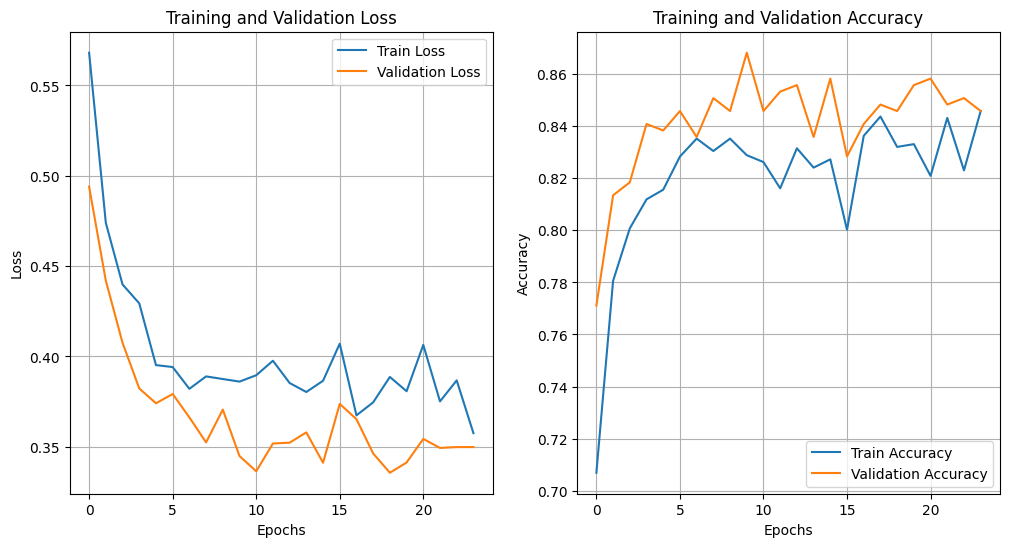

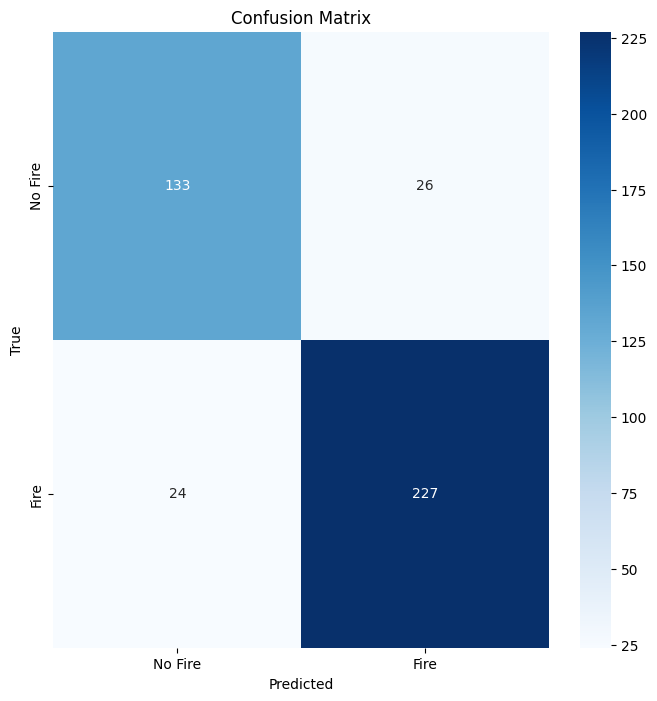

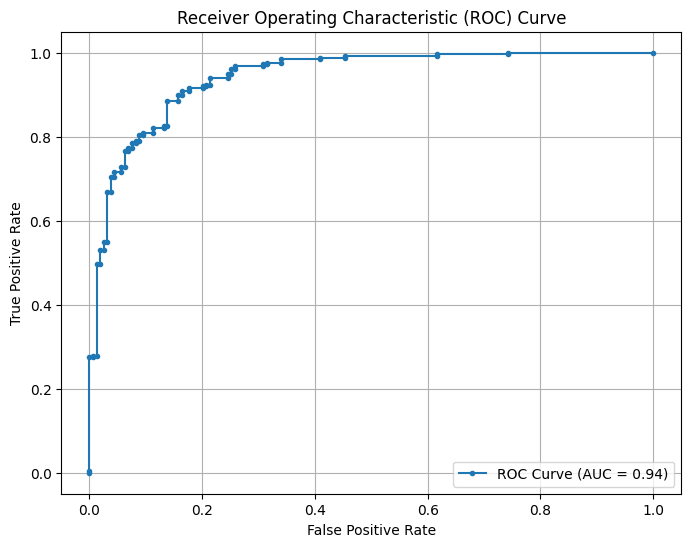

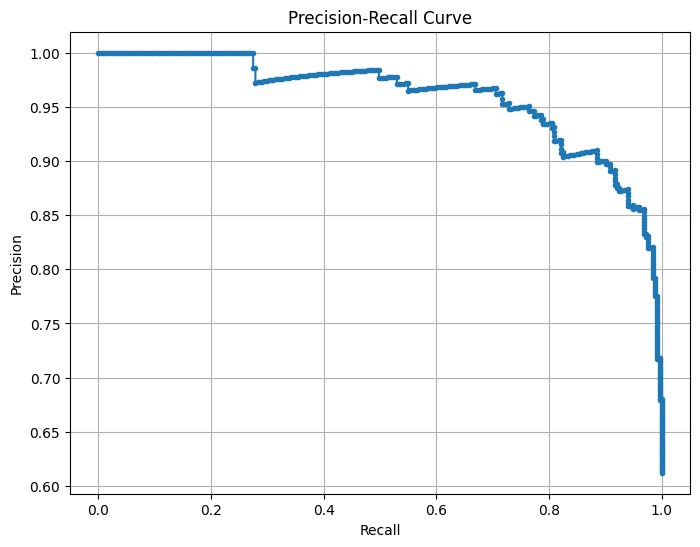

: 

In [10]:
print("[INFO] Saving training and evaluation results...")

# Training curve
plot_training(
    history, output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_training_curve.png")
)

# Confusion matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_confusion_matrix.png")
)

# ROC Curve
plot_roc_curve(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_roc_curve.png")
)

# Precision-Recall Curve
plot_precision_recall(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_precision_recall.png")
)

print("[INFO] All results saved successfully!")